# **Univariate**

Learning Outcomes:

LO 1: Students will be able to select, run, and interpret univariate and bivariate statistical analyses and visualizations.


Univariate analysis: statistical analysis focusing on a single variable at a time.

In [5]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/s/puruptejplzhts5/insurance.csv?dl=1')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **General Information**

**Describe the data**

The df.describe() function generates descriptive statistics of numeric columns in a DataFrame.

In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Describe just age and charges

In [3]:
df[['age', 'charges']].describe()

,age,charges
count,1338.000000,1338.000000
mean,39.207025,13270.422265
std,14.049960,12110.011237
min,18.000000,1121.873900
25%,27.000000,4740.287150
50%,39.000000,9382.033000
75%,51.000000,16639.912515
max,64.000000,63770.428010


Describe just age

In [4]:
df['age'].describe() #this option is needed if the column name has a space or is represented by a variable

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [5]:
df.age.describe() #this option is best for column names without a space

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The two options to describe just one column can be applied to all functions used in this lesson.

**Data Types**

What are the column data types?

Here are some common data types:


*   Object: base data type from which all other types are derived
*   Int: Integer/whole number
*   Float: Floating-point (decimal) numbers





In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Display the data types for all the columns 

In [7]:
for col in df:
  print(col, ": ", df[col].dtype)

age :  int64
sex :  object
bmi :  float64
children :  int64
smoker :  object
region :  object
charges :  float64


Is age a numeric data type?

In [8]:
pd.api.types.is_numeric_dtype(df.age)

True

**Count of Total Values**

Return the count for all the columns

In [9]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

**Count of unique values**

In [10]:
df.age.nunique()

47

**Show unique values**

In [11]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Missing Values**

In [16]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Number or rows and columns**

In [13]:
df.shape

(1338, 7)

# **Range and Middle**

**Mean**



Average value. Sum of numbers / count of numbers

Most common measure of central tendency. It is sensitive to extreme values or outliers that can significantly affect its value. Best used when the data is normally distributed or has a symmetric shape.

Show mean for each numeric column in the dataframe


In [14]:
# df2 = df.select_dtypes(include='number')
# df2.mean()

numericdf = pd.DataFrame()
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) :
        numericdf[col] = df[col]
numericdf.mean()

Inches           15.017191
Ram_GB            8.382195
Weight_kg         2.038734
Price_euros    1123.686992
dtype: float64

**Median**

Middle number in a sorted list of numbers.

In [28]:
numericdf.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

**Mode**



Value that appears the most

In [30]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


**Min**



Lowest value

In [31]:
numericdf.min()

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

**Max**



Highest value

In [15]:
numericdf.max()

Inches           18.4
Ram_GB           64.0
Weight_kg         4.7
Price_euros    6099.0
dtype: float64

**Quantiles**



1st Quantile: 25% of the numbers are below it, 75% of the numbers are above it.

3rd Quantile: 75% of the numbers are below it, 25% of the numbers are above it.

In [33]:
numericdf.quantile(.25)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [34]:
numericdf.quantile(.75)

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64

# **Normality and Spread**

**Standard Deviation**



A number used to tell how measurements for a group are spread out from the average.

A low standard deviation means that most of the numbers are close to the average.

A high standard deviation means that the numbers are more spread out.

Think of a group of people playing darts. The target represents the average value, and each dart throw represents a data point. The standard deviation would indicate how closely or widely the darts landed around the target.

If the standard deviation is small, it means the data points are tightly clustered around the average, indicating less variability or spread. On the other hand, if the standard deviation is large, it means the data points are more scattered, indicating greater variability or spread.

In [35]:
numericdf.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

**Skewness**

Skewness is a statistical measure that helps us understand the shape of a distribution or a set of data. It tells us if the data is spread out evenly or if it is concentrated more towards one side.

If the curve is shifted to the left or to the right, it is said to be skewed.

If the skewness is between 1 and -1 it is considered 'normal'.

Skewness helps us understand the shape of data and detect any potential outliers or deviations from a symmetrical pattern.

Imagine you have a dataset that represents the heights of people in a group. If the majority of people are shorter and there are only a few exceptionally tall individuals, the distribution would be skewed to the right (positive skewness). On the other hand, if most people are taller and there are only a few exceptionally short individuals, the distribution would be skewed to the left (negative skewness).

In [16]:
numericdf.skew()

Inches        -0.446913
Ram_GB         2.686806
Weight_kg      1.144963
Price_euros    1.520866
dtype: float64

**Kurtosis**

Measures how high or low the peak of the data is. Also measures normality.

If the kurtosis is between -1 and 1, it is considered 'normal'.

Imagine you have a dataset representing the exam scores of students. If the scores are concentrated around the average with a sharp peak, the distribution has high kurtosis. On the other hand, if the scores are more spread out and the distribution has flatter tails, it has low kurtosis.

In [13]:
numericdf.kurt()

NameError: name 'numericdf' is not defined

# **Histplot**

Plot a histplot for charges.


Seaborn Histplot Documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(numericdf, x = 'age')
plt.title('Charges')
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

Add a third dimension and show if a person smokes or not as the color

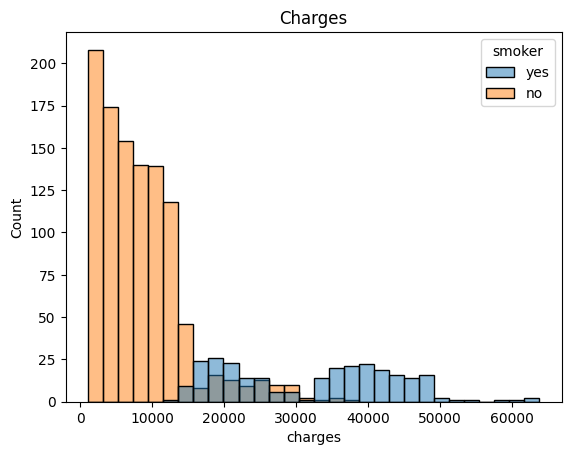

In [47]:
sns.histplot(df, x = 'charges', hue='smoker')
plt.title('Charges')
plt.show()

# **Boxplot**

What does a boxplot show you?

<Axes: xlabel='charges'>

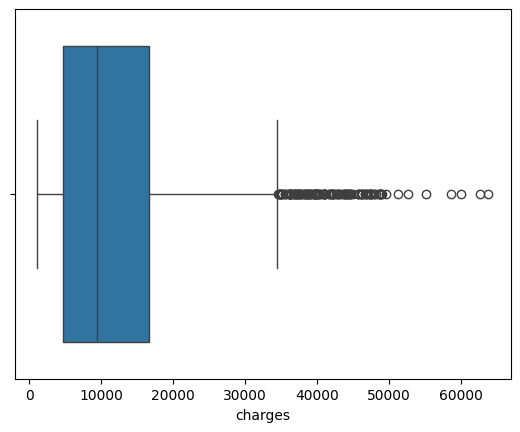

In [49]:
sns.boxplot(df, x='charges')

# **Pivot Tables** (Also can use groupby)

Create a pivot table that shows the mean charges for each region. Sort by charges ascending.

In [6]:
import pandas as pd
df.pivot_table(index = "region", values = "charges", aggfunc="mean").sort_values("charges", ascending=True)

,charges
region,
southwest,12346.937377
northwest,12417.575374
northeast,13406.384516
southeast,14735.411438


Create a pivot table that shows the mean age for each region. Show only the smallest age.

In [51]:
df.pivot_table(index="region", values = 'age', aggfunc='mean').nsmallest(1, 'age')

,age
region,
southeast,38.93956


.nsmallest will show the lowest values.

.nlargest will show the largest values

Pass in the number of records to display and the value you are sorting by.

# **Laptop Practice Problems - You Try**

This dataset shows the current inventory of laptops in a store. Here is a [data](https://www.kaggle.com/datasets/muhammetvarl/laptop-price) key.

In [7]:
df = pd.read_csv('https://www.dropbox.com/s/93hdhicj7ko5ypw/laptops.csv?dl=1')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


**What is the average laptop price?**

In [8]:
df.Price_euros.mean()

1123.6869915579432

**What company has the most products in stock?**

In [33]:
df.groupby('Company')['Product'].count().sort_values()

Company
Huawei         2
LG             3
Chuwi          3
Google         3
Fujitsu        3
Vero           4
Xiaomi         4
Microsoft      6
Mediacom       7
Razer          7
Samsung        9
Apple         21
Toshiba       48
MSI           54
Acer         103
Asus         158
HP           274
Lenovo       297
Dell         297
Name: Product, dtype: int64

**What are the specifications of the most expensive computer?**

In [11]:
df.sort_values(by='Price_euros', ascending=False).head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


**What are the average prices for each company? Which company has the lowest average prices? Highest average prices?**

In [30]:
df.groupby('Company').mean('Price_euros').sort_values('Price_euros')

,Inches,Ram_GB,Weight_kg,Price_euros
Company,,,,
Vero,13.825000,3.500000,1.330000,217.425000
Mediacom,13.457143,3.714286,1.337143,295.000000
Chuwi,14.500000,4.666667,1.726667,314.296667
Acer,15.063107,5.980583,2.166893,626.775825
Fujitsu,15.600000,6.666667,2.233333,729.000000
HP,14.943066,6.912409,1.911314,1067.774854
Lenovo,14.872727,8.040404,2.002290,1086.384444
Asus,15.450000,9.594937,2.220196,1104.169367
Xiaomi,14.450000,10.000000,1.620000,1133.462500


**Are any of the numeric values skewed?**

In [18]:
numericdf.skew()

Inches        -0.446913
Ram_GB         2.686806
Weight_kg      1.144963
Price_euros    1.520866
dtype: float64

**Create a histplot for prices. What insights can you derive?**

<Axes: xlabel='Price_euros', ylabel='Count'>

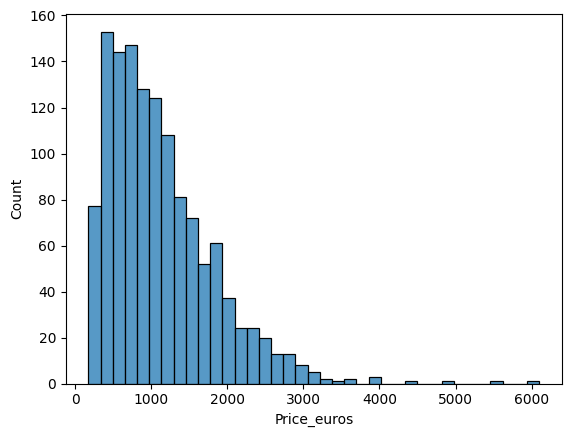

In [20]:
sns.histplot(df['Price_euros'])

**What is the standard deviation of laptop prices? What does this mean?**

In [9]:
df.Price_euros.std()

699.0090425337413

**Explore the laptop data. What other interesting insights can you find?**

# **World Bank Dataset**

"Data powers development. By unlocking the full value of data for development, the Development Data Group helps achieve the World Bank's mission to create a world free from poverty on a livable planet."

[The World Bank Development Data Group](https://www.worldbank.org/en/about/unit/unit-dec/dev/about)

[Video](https://www.worldbank.org/en/about/unit/unit-dec/dev/work-areas)

You will use the World Bank dataset for your Univariate homework. This data provides key statistics for numerous countries from 2000 - 2019.

In [ ]:
dfWorldBank = pd.read_csv('https://www.dropbox.com/s/2ervif08bxu4id3/WorldBankData.csv?dl=1')
dfWorldBank.head()

In [ ]:
import pandas as pd
df2 = pd.read_csv('https://www.dropbox.com/scl/fi/0zneuew9yvgysa51ztsxi/WorldBankDataReName.csv?rlkey=le45ehajl1jqrrf3zgqb12hxc&dl=1')
df2.head()

How many unique values are there for 'Indicator Name'? What are some examples of 'Indicator Name'?

# **World Bank - Filtering and Pivot Table Practice**

1. What are the top 5 countries that have the highest mean mortality rate attributed to unintentional poisoning (per 100,000 population) accross all the years?

Tip: You will want to filter the dataframe before starting on the pivot table.

2. How many incidences of tuberculosis did South Africa have in 2008?

3. What 10 countries have the largest mean adolescent fertility rate (births per 1,000 women ages 15-19) in 2000?

4. What 10 countries have the largest mean adolescent fertility rate (births per 1,000 women ages 15-19) from the years 2015 - 2019 (including 2015 and 2019)?

# **Extra Practice Problems - Pivot Tables/Filtering with World Bank Data**

These are extra problems for you to attempt outside of class, if you want.

What top 10 countries have the highest average (mean) number of commercial bank branches (per 100,000 adults) from 2015-2019 (inclusive of those years)?

Create a pivot table that shows the number of commerical bank branches (per 100,000 adults) from 2015-2019 (inclusive) in the United States. The pivot table will return 5 rows (one row for each year)